In [7]:
# Initialize Otter
import otter
grader = otter.Notebook("project1.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Project 1: World Population and Poverty

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis folder [countries-etc-datapoints](https://github.com/open-numbers/ddf--gapminder--systema_globalis/tree/master/countries-etc-datapoints) on GitHub without any changes. 

*Since the data changes over time, the project will actually use CSV files in the project folder for consistency rather than drawing from the real data that could update while you are working on the project.*

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

## 🎗️ Reminders

* **Canvas Assignment Details**. View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details such as the assignment rubric and due dates.
* **Auto-Grader.** Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
* **[Optional] Project Partner.** 
    * For this assignment, you are allowed to complete this project with a partner, but you are not required to work with a partner.
    * If you want to work with someone, you and your partner should set up a Canvas group with your instructor for this assignment.
    * Keep in mind that for group assignments, one submission will count for the entire group in Canvas.
    * You and your partner will receive the same grade for this project.
* **Code Sharing.** Don't share your code directly with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for our exams and potentially for future work in this field. If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem or you can focus on a specific part of a task.
* **Support.** You are not alone! Meet with your instructor or the tutors, post questions on Canvas or the student Discord channel, and talk to your classmates during our meetings. If you're ever feeling overwhelmed or don't know how to make progress, talk to your instructor or a tutor.
* **Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).
* **Open Response Tasks:** Make sure that you put the answers to the written questions in the indicated cell we provide and generate the graphs as requested. Usually, the point number for the open response tasks corresponds to the number of things you need to address in your response.
* **Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in the first task, we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.
* You are never expected to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like! 

Run the following cell to get and import the relevant tools.

In [8]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 📈 Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, 7 billion around 2011, and 8 billion around 2022. The potential impact of population growth has concerned scientists, economists, and politicians alike.

The United Nations Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching and stabilizing at 11 billion by 2100. However, the UN does not rule out scenarios of slower or more extreme growth. These projections help us understand long-term population processes, even if they leave out possible global catastrophic events like war or climate crises.

The following image was taken from the [United Nation's World Population Prospects 2022 report](https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/wpp2022_summary_of_results.pdf).

<img src="UN_WPP_2022_Global_Projection.png" alt="The UN's projection of Global population size and growth rate from 1950 through 2050."/> 

In this part of the project, we will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, we will examine the data for one country, Poland. We will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Poland, and how they are related to the rate of population growth.
- Next, we will examine whether the changes we have observed for Poland are particular to that country or whether they reflect general patterns observable in other countries too. We will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [9]:
population = Table.read_table('population.csv')
population.where('time', 2010)

geo,time,population_total
afg,2010,29185511
ago,2010,23356247
alb,2010,2948029
and,2010,84454
are,2010,8549998
arg,2010,40895751
arm,2010,2877314
atg,2010,88030
aus,2010,22154687
aut,2010,8409945


### 🇵🇱 Poland

The Central European nation of Poland has undergone many changes over the centuries. In modern times it was (re)created as a democratic republic in 1919 after World War I. It was invaded and divided in World War II between Germany and the Soviet Union. War and the Holocaust had a devastating impact on its people. Poland was constituted in its current borders at the end of World War II (1945) under a communist government. In 1989, with the fall of the Soviet Union, Poland re-established itself as a democratic republic.

In this section of the project, we will examine aspects of the population of Poland since 1900. Poland's borders have changed, so we will look at the population within its current (2012) borders.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. Use the Alpha-3 link to find the 3-letter code for Poland.

### Task 01 📍

Create a table called `p_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1900 through 2020 (including both 1900 and 2020) and the second should contain the population of Poland in each of those years.


_Points:_ 4

In [10]:
p_pop = population.where('time', are.above_or_equal_to(1900)).where('time', are.below_or_equal_to(2020)).where('geo',are.equal_to('pol')).drop('geo')
p_pop.show(3)

time,population_total
1900,24340168
1901,24517983
1902,24694172


In [11]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ It seems like you have the correct columns in p_pop.
task_01 - 2 message: ✅ It seems the you have the correct time values in p_pop

Run the following cell to create a table called `p_five` that has the population of Poland every five years.

In [12]:
p_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1900, 2021, 5) # 1900, 1905, 1910, ...
p_five = p_pop.sort('time').where('time', are.contained_in(fives))
p_five.show(3)

time,population_total
1900,"24,340,168"
1905,"25,221,471"
1910,"25,844,639"


Run the following cell to visualize the population over time. Following the devastating effects of World War I and World War II, Poland's population increased steadily from 1950 to 2000 and then leveled off. In the following questions we'll investigate this period of population growth.

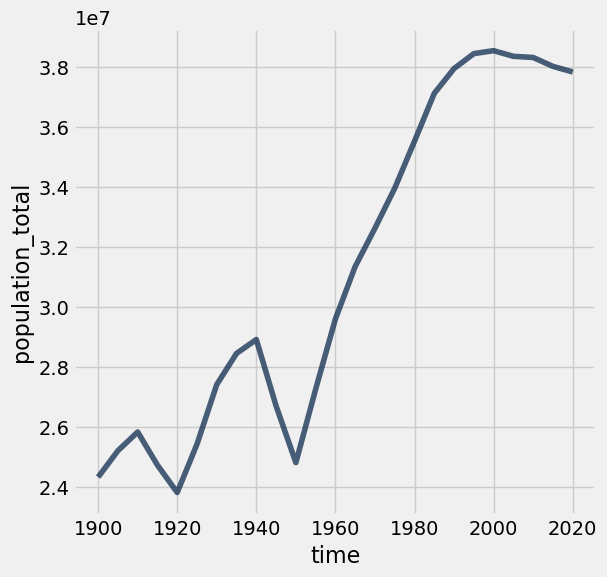

In [13]:
p_five.plot(0, 1)

### Task 02 📍

Assign `initial` to an array that contains the population for every five year interval from **1900 to 2015** (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from **1905 to 2020** (inclusive). The first array should include both 1900 and 2015, and the second array should include both 1905 and 2020. You should use the `p_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$\left(\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\displaystyle\frac{1}{\text{number of years}}}\right) -1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `p_five` called `annual_growth`. **Don't worry about the calculation of the growth rates**; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of the textbook.

_Points:_ 6

In [14]:
initial = p_five.where('time', are.between_or_equal_to(1900, 2015)).column('population_total')
changed = p_five.where('time', are.between_or_equal_to(1905, 2020)).column('population_total')

p_1900_through_2015 = p_five.where('time', are.between_or_equal_to(1900, 2015)) 
p_five_growth = p_1900_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
p_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1900,"24,340,168",0.71%
1905,"25,221,471",0.49%
1910,"25,844,639",-0.87%
1915,"24,739,041",-0.75%
1920,"23,827,906",1.32%
1925,"25,439,942",1.52%
1930,"27,427,399",0.75%
1935,"28,465,230",0.32%
1940,"28,927,566",-1.58%
1945,"26,713,772",-1.46%


In [15]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ One of the values we checked in p_five_growth is between 0.005 and 0.05.
task_02 - 2 message: ✅ It seems that your largest growth rate is less than 0.02.

The annual growth rate in Poland has been declining since 1950, as shown in the table below. 

In [16]:
p_five_growth.where('time', are.above_or_equal_to(1950)).show()

time,population_total,annual_growth
1950,"24,824,007",1.90%
1955,"27,269,742",1.66%
1960,"29,614,201",1.15%
1965,"31,360,903",0.80%
1970,"32,639,262",0.80%
1975,"33,970,730",0.91%
1980,"35,539,723",0.88%
1985,"37,133,860",0.44%
1990,"37,960,193",0.26%
1995,"38,458,642",0.05%


Next, we'll try to understand what has changed in Poland that might explain the slowing population growth rate. Run the next cell to load three additional tables of measurements about countries over time.

In [17]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [18]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [19]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [20]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


### Task 03 📍🔎

<!-- BEGIN QUESTION -->

Is population growing more slowly perhaps because people aren't living as long? Use the `life_expectancy` table to draw a line graph with the years 1950 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Poland. Make sure you filter the table properly; otherwise, the graph may look strange!


_Points:_ 2

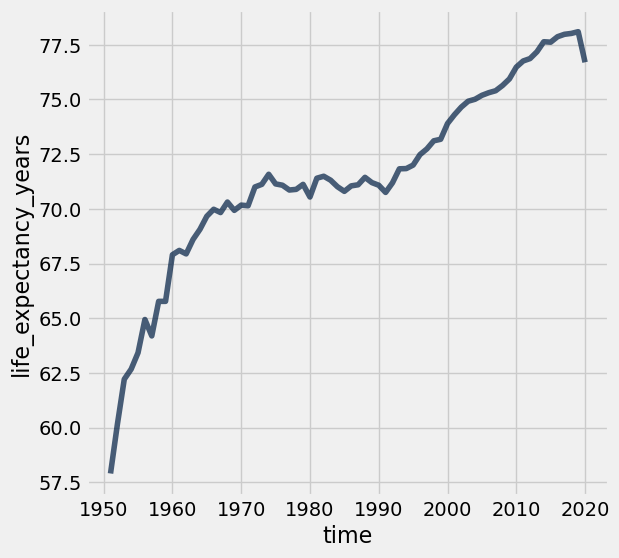

In [21]:
#Fill in code here
pol = life_expectancy.where('geo', are.equal_to('pol')).where('time', are.above(1950))
pol.plot('time', 'life_expectancy_years')

<!-- END QUESTION -->

### Task 04 📍🔎

<!-- BEGIN QUESTION -->

Do the trends in life expectancy in the graph above directly explain why the population growth rate decreased since 1950 in Poland? Why or why not?

_Points:_ 2

The trends in life expectancy don't directly explain why the population growth has decreased since 1950 because this line plot only accounts for the life expectancy increase in 1950. Therefore, we can't make assumptions about the impact this had on the population growth rate without more data on this particular matter.

<!-- END QUESTION -->

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

### Task 05 📍

* Complete the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` with one row per year starting with (and including) the `start` year and including all later years in the `fertility` table. You will probably need to use the `relabeled` method from the `datascience` module to relabel the columns.
* Then, set `poland_code` to the Alpha-3 code for Poland. The provided call `fertility_over_time(poland_code, 1950)` returns a table that shows Poland's annual fertility rates since 1950. 


_Points:_ 5

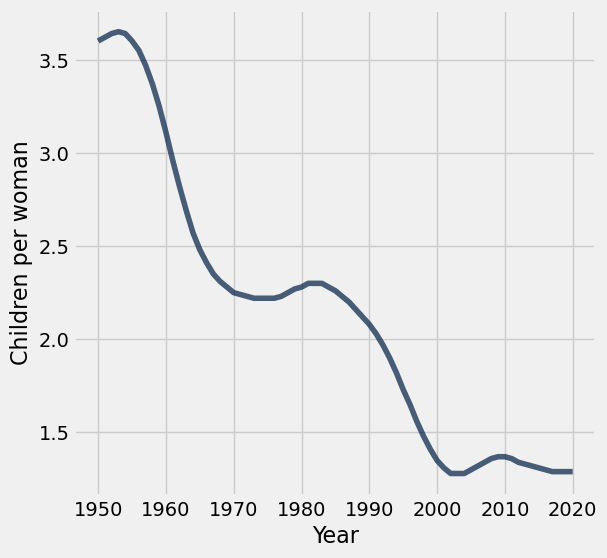

In [22]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', are.equal_to(country))
    country_fertility_after_start = country_fertility.where('time', are.above(start - 1))
    cleaned_table = country_fertility_after_start.relabeled('time', 'Year').relabeled('children_per_woman_total_fertility', 'Children per woman').drop('geo')
    return cleaned_table

poland_code = 'pol'
fertility_over_time(poland_code, 1950).plot(0, 1) # You should *not* change this line.

In [23]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You seem to have the correct column labels!
task_05 - 2 message: ✅ Your years seem to span the correct interval.
task_05 - 3 message: ✅ Your years seem to span the correct interval.

Plotting the fertility rate in Poland since 1950, we see a downward trend.

### Task 06 📍🔎

<!-- BEGIN QUESTION -->

Do the trends in fertility in the graph above help explain why the population growth rate decreased from 1950 to 2020 in Poland? 

_Points:_ 2

Yes, the trends in fertility in the graph help explain why the population growth rate decreased from 1950 to 2020 in Poland because it shows that women have been having increasingly less children in Poland over time.

<!-- END QUESTION -->

As seen in the [Population Horizons Factsheet No.5]((https://www.ageing.ox.ac.uk/download/143)), lower fertility rates are often associated with lower child mortality rates. We can see if this association is evident in Poland by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

### Task 07 📍

Create a table `poland_since_1950` that contains one row per year starting with 1950 and:

- A column `Year` containing the year
- A column `Children per woman` describing total fertility in Poland that year
- A column `Child deaths per 1000 born` describing child mortality

_Points:_ 8

In [24]:
pol_fertility = fertility_over_time('pol', 1950)
pol_child_mortality = child_mortality.where('time', are.above(1949)).where('geo', are.equal_to('pol')).column('child_mortality_under_5_per_1000_born')
poland_since_1950 =  pol_fertility.with_column('Child deaths per 1000 born', pol_child_mortality)
poland_since_1950

Year,Children per woman,Child deaths per 1000 born
1950,3.6,164.08
1951,3.62,177.18
1952,3.64,140.16
1953,3.65,127.65
1954,3.64,118.9
1955,3.6,110.38
1956,3.55,94.19
1957,3.47,86.72
1958,3.37,81.28
1959,3.25,72.1


In [25]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ It looks like you've covered the correct range of years.
task_07 - 2 message: ✅ Your labels in poland_since_1950 seem correct.

Run the following cell to generate a scatter plot from the `poland_since_1950` table you created.

The plot uses **color** to encode data about the `Year` column. The colors, ranging from dark blue to white, represent the passing of time between 1950 and 2020. For example, a point on the scatter plot representing data from the 1950s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.

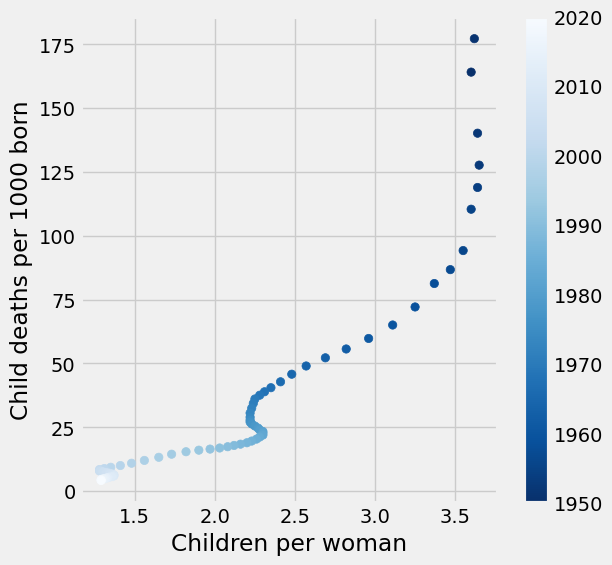

In [26]:
x_births = poland_since_1950.column("Children per woman")
y_deaths = poland_since_1950.column("Child deaths per 1000 born")
time_colors = poland_since_1950.column("Year")

plt.figure(figsize=(6,6))
plt.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plt.colorbar()                  
plt.xlabel("Children per woman")
plt.ylabel("Child deaths per 1000 born");

### Task 08 📍🔎

<!-- BEGIN QUESTION -->

In one or two sentences, describe the association (if any) that is illustrated by this scatter plot. Does the diagram show any causal relation between between fertility and child mortality?

_Points:_ 2

This scatter plot does show an causal relation between fertility and child mortality because it looks like the more children a woman has, the higher the child death rate is per 1000 born.

<!-- END QUESTION -->

---

### 👋 Submit your Progress Check to Canvas

1. In the related Canvas Assignment page, check the requirements for a Complete score for this checkpoint.
2. Run the following code cell that will run all of the auto-grader tests for the above tasks.
3. Double-check that you have provided a response to tasks 03, 04, 06, and 08 that will need to be manually reviewed.
4. Select the menu items `File`, `Save and Export Notebook As...`, and `Html_embed` in the notebook's Toolbar to download an HTML version of this notebook file.
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded HTML file.

**Keep in mind that the auto-grader does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the auto-grader for a question does not mean you got the answer correct for that question.**

In [27]:
try:
    checkpoint_tests = ["task_01", "task_02", "task_05", "task_07"]
    for test in checkpoint_tests:
        display(grader.check(test))
except NameError:
    print('The auto-grader has not be initialized.')

task_01 results: All test cases passed!
task_01 - 1 message: ✅ It seems like you have the correct columns in p_pop.
task_01 - 2 message: ✅ It seems the you have the correct time values in p_pop

task_02 results: All test cases passed!
task_02 - 1 message: ✅ One of the values we checked in p_five_growth is between 0.005 and 0.05.
task_02 - 2 message: ✅ It seems that your largest growth rate is less than 0.02.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You seem to have the correct column labels!
task_05 - 2 message: ✅ Your years seem to span the correct interval.
task_05 - 3 message: ✅ Your years seem to span the correct interval.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ It looks like you've covered the correct range of years.
task_07 - 2 message: ✅ Your labels in poland_since_1950 seem correct.

---

### 🌐 The World

The changes observed in Poland can also be observed in many other countries: except during periods of extended war, famine, and social chaos, health services generally improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and where it does, the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1962 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

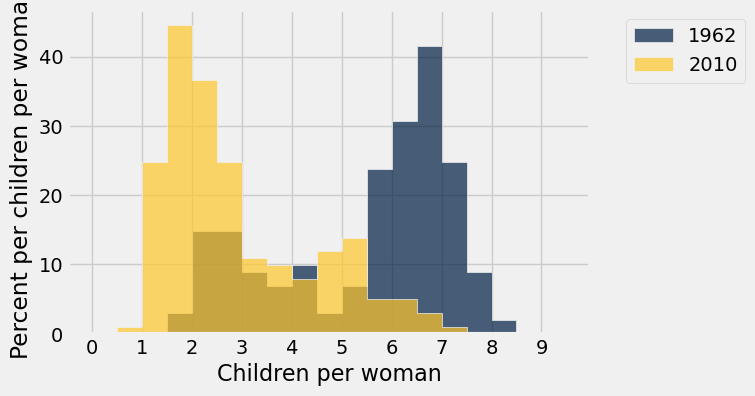

In [28]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plt.xlabel('Children per woman')
_ = plt.ylabel('Percent per children per woman')
_ = plt.xticks(np.arange(10))

### Task 09 📍

Assign `fertility_statements` to an **array** of the numbers of each statement below that can be correctly inferred from these histograms.

1. About the same number (within 3%) of countries had a fertility rate between 3.5 and 4.5 in both 1962 and 2010.
1. In 1962, less than 20% of countries had a fertility rate below 3.
1. At least half of countries had a fertility rate between 5 and 8 in 1962.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. At least half of countries had a fertility rate below 3 in 2010.
1. More countries had a fertility rate above 3 in 1962 than in 2010.


_Points:_ 2

In [29]:
fertility_statements = make_array(2, 3, 5, 6)

In [30]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ Great job formatting your answer as an array of integers.

### Task 10 📍🔎

<!-- BEGIN QUESTION -->

Draw a line plot of the world population from 1800 through 2020 (inclusive of both endpoints). The world population is the sum of all of the countries' populations. You should use the `population` table defined earlier in the project. 

_Points:_ 2

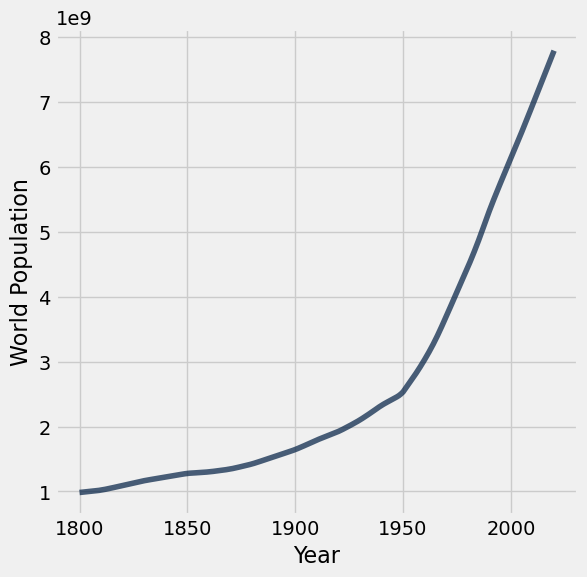

In [31]:
#Fill in code here
world_populations = make_array()
year_array = make_array()

for i in range(1800, 2021):
    year = population.where('time', are.equal_to(i))
    total_pop = np.sum(year.column('population_total'))
    world_populations = np.append(world_populations, total_pop)
    year_array = np.append(year_array, i)

world_pops = Table().with_columns('Year', year_array, 'World Population', world_populations)

world_pops.plot('Year', 'World Population')

<!-- END QUESTION -->

### Task 11 📍

Create a function `stats_for_year` that takes a `year` and returns a table of statistics that addresses the following: 
* The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`.
* Each row should contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. 
* Only include rows for which all three statistics are available for the country and year.
* In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2020. This restriction will speed up computations later in the project.
* After you write `stats_for_year`, CALL `stats_for_year` on any year between 1960 and 2020. Try to understand the output of stats_for_year.

As you work, consider the following:
* The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `grader` tests to confirm your work.
* What do all three tables have in common (pay attention to column names)?


_Points:_ 4

In [32]:
# We first create a population table that only includes the 
# 50 countries with the largest 2020 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    pf = p.join('geo', f, 'geo')
    pfc = pf.join('geo', c, 'geo')
    return pfc

# Call stats_for_year for any year between 1960 and 2020.
stats_for_year(2018)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,37171922,4.33,62.28
ago,30809787,5.55,77.16
arg,44361150,2.26,9.94
bgd,161376713,2.05,30.16
bra,209469320,1.7,14.35
can,37074558,1.56,4.97
chn,1427647789,1.64,8.6
cod,84068092,5.92,88.1
col,49661056,1.82,14.21
deu,83124413,1.48,3.66


In [33]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ Your function generates a table with the correct columns.
task_11 - 2 message: ✅ Your function produces a table with the correct number of rows.
task_11 - 3 message: ✅ It seems like your function created the right fertility values for the year 1960.
task_11 - 4 message: ✅ It seems like your function created the right child mortality values for the year 1960.

### Task 12 📍

Create a table called `pop_by_decade` with two columns called `decade` and `population`, in this order. 
* It has a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. For example, 1960 is the start of the 1960's decade. 
* The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. You should see that these countries contain most of the world's population.

As you work on this task, consider:
* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column.  **Think about how you can use the `stats_for_year` function** from the previous question if you want to implement `pop_for_year`. This first test is just a sanity check for your helper function if you choose to use it. **You will not lose points for not implementing the function `pop_for_year`**.
* The cell where you will generate the `pop_by_decade` table is below the cell where you can choose to define the helper function `pop_for_year`. You should define your `pop_by_decade` table in the cell that starts with the table `decades` being defined. 

_Points:_ 0

In [34]:
def pop_for_year(year):
    year_stats = stats_for_year(year)
    total_pop = np.sum(year_stats.column('population_total'))
    return total_pop

In [35]:
grader.check("task_12_pop_for_year_check")

task_12_pop_for_year_check results: All test cases passed!
task_12_pop_for_year_check - 1 message: ✅ The function seems to work correctly for 1972.
task_12_pop_for_year_check - 2 message: ✅ The function seems to work correctly for 1989.
task_12_pop_for_year_check - 3 message: ✅ The function seems to work correctly for 2002.

Now that you've defined your helper function (if you've chosen to do so), define the `pop_by_decade` table.


_Points:_ 7

In [36]:
decades = Table().with_column('decade', np.arange(1960, 2021, 10))

pop_by_decade = decades.with_column('population', decades.apply(pop_for_year, 'decade'))

pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


In [37]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ pop_by_decade has the correct labels.
task_12 - 2 message: ✅ The first year of the 1960s is 1960.

The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [38]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
filtered_countries = countries.select('country', 'name', 'world_6region')

### Task 13 📍

Create a table called `region_counts`. 
* It should contain two columns called `region` and `count`. 
    * The `region` column should contain regions of the world
    * The`count` column should contain the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

For example, one row would have `south_asia` as its `region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 2020.

As you work, consider that you may have to relabel a column to name it `region`.

_Points:_ 4

In [39]:
stats_for_2020 = stats_for_year(2020)
all_stats_2020 = stats_for_2020.join('geo', filtered_countries, 'country')
region_counts = all_stats_2020.group('world_6region').relabeled('world_6region', 'region')
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


In [40]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ region_counts contains the correct labels.
task_13 - 2 message: ✅ The count sum totals 50 as expected.

The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

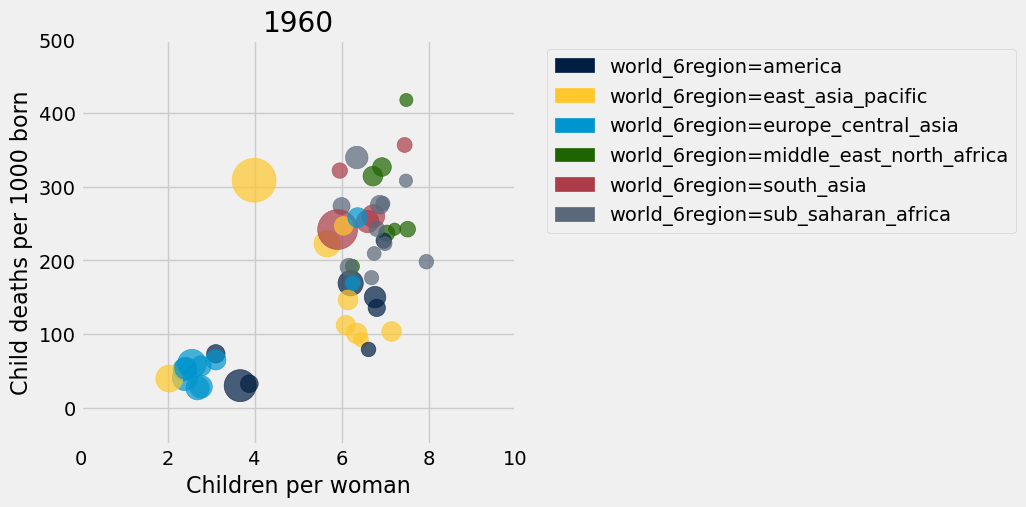

In [41]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plt.xlim(0,10)
    plt.ylim(-50, 500)
    plt.title(year)
    plt.show()

fertility_vs_child_mortality(1960)

### Task 14 📍

Assign `scatter_statements` to an array of the numbers of each statement below that can be inferred from this scatter diagram for 1960. 
1. All countries in `europe_central_asia` had uniformly low fertility rates.
1. The lowest child mortality rate of any country was from an `east_asia_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rates.

_Points:_ 2

In [42]:
scatter_statements = make_array(3, 4)

In [43]:
grader.check("task_14")

task_14 results: All test cases passed!
task_14 - 1 message: ✅ You have provided an array of possible values.

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You’ll find that in terms of population growth, the divide between the countries of the global North and global South that existed in the 1960s has shrunk significantly. 

This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries. Fertility rates change for reasons that include cultural patterns, better prospects for children surviving to adulthood, and family planning (such as contraception and women’s greater control over their reproduction).

**Note:** Don't worry if a red warning pops up when running the cell below. You'll still be able to run the cell!

In [44]:
_ = widgets.interact(fertility_vs_child_mortality, year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

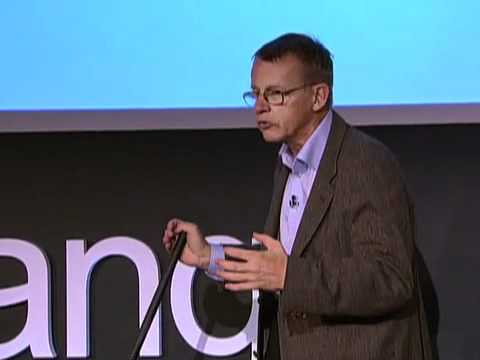

In [45]:
from IPython.display import YouTubeVideo
YouTubeVideo("N-x7eHuUhNM")

When we look at population and fertility as data scientists, we need to learn about the experiences of people in real life, not just abstractly as data. We should also recognize that population studies have sometimes had political undercurrents. Those undercurrents have included population control, control of reproduction, or fears of shifts between racial groups. To do better as data scientists, we should check our assumptions to avoid unthinkingly reproducing past patterns.

---

## 💰 Global Poverty


In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than \$1.90 per day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9\%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere." However, recently, researchers projected on [the World Bank blog](https://blogs.worldbank.org/opendata/updated-estimates-impact-covid-19-global-poverty-turning-corner-pandemic-2021) that there will be an increase in extreme poverty since the start of COVID-19 pandemic.

In this part of the project, we will examine some aspects of global poverty that might affect whether the goal is achievable. The causes of poverty are complex. They include global histories, such as colonialism, as well as factors such as health care, economics, and social inequality in each country.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [46]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.where('geo', are.equal_to('bel')).where('time', are.equal_to(2019))

geo,time,extreme_poverty_percent_people_below_190_a_day
bel,2019,0.1


### Task 15 📍

Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the most recent year for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it.


_Points:_ 3

In [47]:
def first(values):
    return values.item(0)

latest_poverty = poverty.sort('time', descending=True).group('geo', first)
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent') # You should *not* change this line.  
latest_poverty

geo,time,poverty_percent
ago,2018,49.9
alb,2019,0
are,2018,0
arg,2020,1.6
arm,2020,0.4
aus,2018,0.5
aut,2019,0.6
aze,2005,0
bdi,2013,72.8
bel,2019,0.1


In [48]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ The labels of latest_poverty are correct.
task_15 - 2 message: ✅ latest_poverty has the correct number of rows.

### Task 16 📍

Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

You are **not** required to use `poverty_and_pop`, and you are always welcome to add any additional names.

_Points:_ 4

In [49]:
pop_2010 = population.where('time', are.equal_to(2010))
poverty_and_pop = latest_poverty.join('geo', pop_2010, 'geo')
poverty_total = (poverty_and_pop.column('poverty_percent')/100) * poverty_and_pop.column('population_total')
recent_poverty_total = poverty_and_pop.with_column('poverty_total', np.round(poverty_total).astype(int)).drop('time', 'time_2')
recent_poverty_total

geo,poverty_percent,population_total,poverty_total
ago,49.9,23356247,11654767
alb,0,2948029,0
are,0,8549998,0
arg,1.6,40895751,654332
arm,0.4,2877314,11509
aus,0.5,22154687,110773
aut,0.6,8409945,50460
aze,0,9032465,0
bdi,72.8,8675606,6315841
bel,0.1,10938735,10939


In [50]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ recent_poverty_total has the correct labels.
task_16 - 2 message: ✅ recent_poverty_total shows correctly that Australia's population in 2010 is 22,154,687.
task_16 - 3 message: ✅ The number of people estimated to be living in extreme poverty in Australia is 110,773.

### Task 17 📍

Assign the name `poverty_percent` to the known percentage of the world’s 2010 population that were living in extreme poverty. Assume that the `poverty_total` numbers in the `recent_poverty_total` table describe **all** people in 2010 living in extreme poverty. You should find a number that is above the 2018 global estimate of 8%, since many country-specific poverty rates are older than 2018.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries are included in the `recent_poverty_total` table (only some countries have known poverty rates). Use the `population` table to compute the world's 2010 total population.


_Points:_ 2

In [51]:
pops_in_arr = pop_2010.column('population_total')
world_pop_2010 = np.sum(pops_in_arr)
pov_arr = recent_poverty_total.column('poverty_total')
world_pov_count = np.sum(pov_arr)
poverty_percent = (world_pov_count/world_pop_2010)*100
poverty_percent

10.499531677029562

In [52]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ poverty_percent is between 10 and 20.

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [53]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
alb,Albania,europe,41,20
dza,Algeria,africa,28,3
and,Andorra,europe,42.5078,1.52109
ago,Angola,africa,-12.5,18.5
atg,Antigua and Barbuda,americas,17.05,-61.8
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


### Task 18 📍

Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents, in this order:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.


_Points:_ 3

In [54]:
country_info = countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')
world_info = country_info.join('country', recent_poverty_total, 'geo').relabeled('world_4region', 'region')
poverty_map = world_info.select('latitude', 'longitude', 'name', 'region', 'poverty_total')
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,11654767
41,20,Albania,europe,0
23.75,54.5,United Arab Emirates,asia,0
-34,-64,Argentina,americas,654332
40.25,45,Armenia,europe,11509
-25,135,Australia,asia,110773
47.3333,13.3333,Austria,europe,50460
40.5,47.5,Azerbaijan,europe,0
-3.5,30,Burundi,africa,6315841
50.75,4.5,Belgium,europe,10939


In [55]:
grader.check("task_18")

task_18 results: All test cases passed!
task_18 - 1 message: ✅ poverty_map has the correct labels.
task_18 - 2 message: ✅ poverty_map has the correct region values.

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty according to this data. Double-click on the map to zoom in.

In [56]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('poverty_total'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total') + 1
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), this data shows the largest numbers are in Asia and Africa. Keep in mind that what you are observing is based on the data that was collected. There are clear inconsistencies with what is seen in the data and what people actually experience in the world.

### Task 19 📍

Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.


_Points:_ 4

In [57]:
largest = poverty_map.sort('poverty_total', descending=True).select('name', 'poverty_total').take(np.arange(0,10))
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"277,713,262"
Nigeria,"61,974,752"
"Congo, Dem. Rep.","49,843,295"
Ethiopia,"26,993,108"
Tanzania,"21,907,187"
Bangladesh,"21,103,287"
Uzbekistan,"17,565,799"
Madagascar,"16,667,492"
Kenya,"15,593,384"
Mozambique,"14,989,608"


In [58]:
grader.check("task_19")

task_19 results: All test cases passed!
task_19 - 1 message: ✅ largest contains the correct labels.
task_19 - 2 message: ✅ largest correctly identifies (according to this data) India as the country with the largest number of people in extreme poverty.
task_19 - 3 message: ✅ largest contains 10 rows.

### Task 20 📍🔎

<!-- BEGIN QUESTION -->

It is important to study the absolute number of people living in poverty, not just the percent. The absolute number is an important factor in determining the amount of resources needed to support people living in poverty. In the next two questions you will explore this.

In the task after this, you will be asked to write a function called `poverty_timeline` that takes the name of a country as its argument (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the poverty table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country in that year.

For this task, write out a generalized process for the function you will write in the next task. What should this function output, and what steps will you take within the function? Keep in mind you are not focusing on writing the code, you are focusing on explaining the concept of how the function should work.

_Points:_ 2

The first step would be to create a helper function that can get a country's population during a certain year. We can do this by passing a row to it, and filtering it for the year and the geo tag to get the population out of it. This will be useful later on when we need a country's population to be multiplied by its poverty rate to get the count of people in poverty during a certain year. 

Next, in the poverty_timeline function, we can search for the name of our country within the countries table, which will give us the row that will have our country's geo tag. Using this geo tag, we can now clean up the poverty table for just the rows that have our geo tag in it and assign this new filtered table a name, say 'country_poverty'. 

Now, to get an array of the percentage of people in poverty for a certain year, we can turn the column holding the poverty rates in country_poverty into an array using the .column function, and divide every value in this array by 100 to get its decimal value. Following this, we need to get our population for each respective year so that we can multiply each year's poverty rate by its population to get the count of people in poverty for that year. We can get an array of the population for every year by using the country_poverty table and applying the helper function we made earlier to get each years population. Now we can multiply our array of poverty rates by our array of populations to get the counts of people in poverty for a certain year. 

Finally, we can simply call the .column funcion once again on our country_poverty table to get each year into an array. Now we can create a new table, one column with our array of years, and one column for the array holding the number of people in poverty for each year. Finally, we can call the .plot function on our newly created table and pass in the year column for x, and the counts of people in poverty column for y. 

<!-- END QUESTION -->

### Task 21 📍🔎

<!-- BEGIN QUESTION -->

Now, we'll actually write the function called `poverty_timeline`. Recall that `poverty_timeline` takes **the name of a country** as its argument (not the Alpha-3 country code). 
* It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. 
* The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

Consider the following while working on this task:
* This question is long. Feel free to create cells and experiment. You can create cells by going to the toolbar and hitting the `+` button.
* It might be helpful to join the information from different tables in your code.

_Points:_ 2

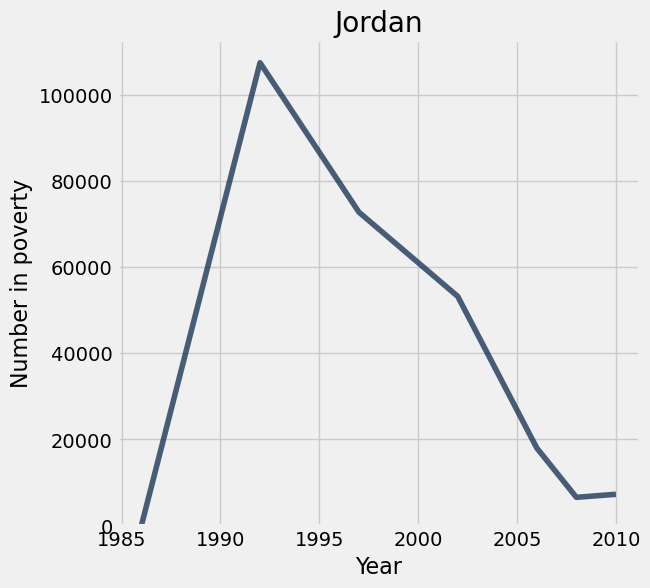

In [59]:
def get_population(row):
    return population.where('time', row.item('time')).where('geo', row.item('geo')).column('population_total').item(0)

def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    geo_code = countries.where('name', country).column('country').item(0)
    country_poverty = poverty.where('geo', geo_code)
    in_poverty = country_poverty.column('extreme_poverty_percent_people_below_190_a_day') / 100 * country_poverty.apply(get_population)
    Table().with_columns('Year', country_poverty.column('time'), 'Number in poverty', in_poverty).plot('Year', 'Number in poverty')
    
    # This solution will take multiple lines of code. Use as many as you need
    
    
    # Don't change anything below this line. 
    plt.title(country)
    plt.ylim(bottom=0)
    plt.show() # This should be the last line of your function. 

poverty_timeline('Jordan')

<!-- END QUESTION -->

Finally, draw the timeline below for India. You can check your work by comparing your graph to the one on [gapminder.org](https://www.gapminder.org/tools/#$state$entities$show$country$/$in@=ind;;;;&marker$axis_y$which=number_of_people_in_poverty&scaleType=linear&spaceRef:null;;;&chart-type=linechart).


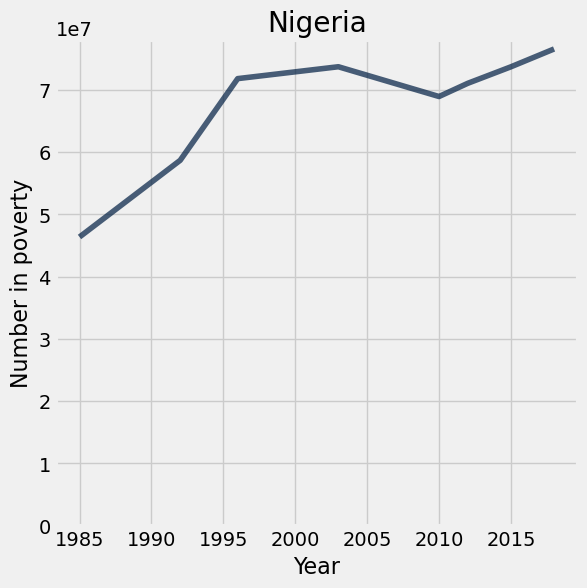

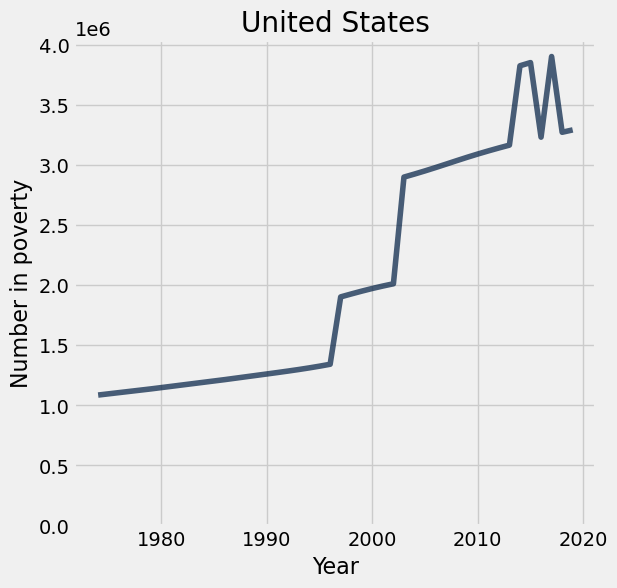

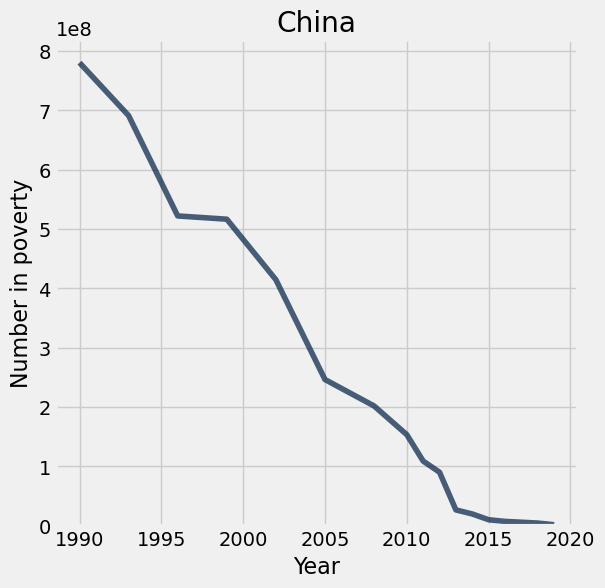

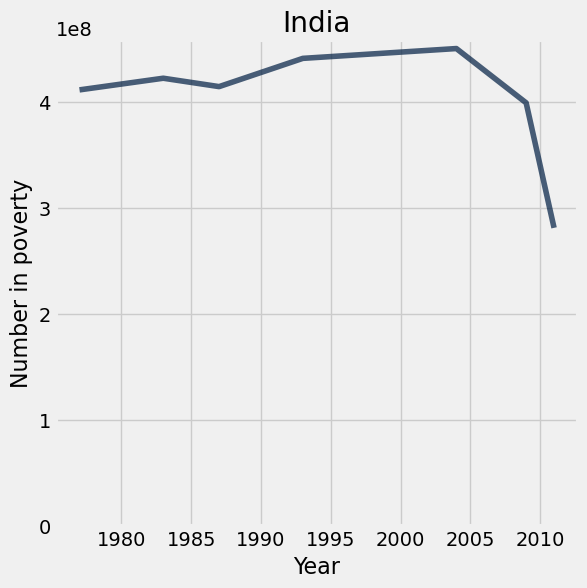

In [60]:
poverty_timeline('Nigeria')
poverty_timeline('United States')
poverty_timeline('China')
poverty_timeline('India')

### Task 22 📍🔎

<!-- BEGIN QUESTION -->

According to the data, the number of people living in extreme poverty has been increasing in Nigeria and the United States, and the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

For this task, make sure to address the following. Your response should be about 3-4 sentences, but you are welcome to provide more details.

* Select a country that is not Nigeria, the United States, China, or India in the dropdown menu of the widget below to create the plot showing poverty numbers over the time periods available in the data set.
* In general, describe how the number of those in extreme poverty in that particular country has changed over time.
* Almost every graph has some interesting point(s) in the line where there was a change in the trend of the poverty numbers. Connect the pattern you see to at least one historical observation about that particular country or global event. Include a link to a resource that provides context for that historical observation. Sometimes these changes are associated with changes in political leadership, war, famine, economic development, etc.

_Points:_ 3

In [61]:
all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'United Arab Emirates', 'A…

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**You're finished!** Congratulations on working through your first project on data visualization and table manipulation.

## 🏁 Submit your Project to Canvas

Once you have finished working on the projects tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.
    * _Keep in mind that if you are working in a group, then you only submit one file for your group._

**Keep in mind that the auto-grader does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [62]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ It seems like you have the correct columns in p_pop.
task_01 - 2 message: ✅ It seems the you have the correct time values in p_pop

task_02 results: All test cases passed!
task_02 - 1 message: ✅ One of the values we checked in p_five_growth is between 0.005 and 0.05.
task_02 - 2 message: ✅ It seems that your largest growth rate is less than 0.02.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You seem to have the correct column labels!
task_05 - 2 message: ✅ Your years seem to span the correct interval.
task_05 - 3 message: ✅ Your years seem to span the correct interval.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ It looks like you've covered the correct range of years.
task_07 - 2 message: ✅ Your labels in poland_since_1950 seem correct.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ Great job formatting your answer as an array of integers.

task_11 results: All test ca